In [ ]:
!pip install kaggle

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
100% 163M/163M [00:06<00:00, 34.5MB/s]
100% 163M/163M [00:06<00:00, 28.5MB/s]


In [3]:
from zipfile import ZipFile
file_name = "/content/face-mask-dataset.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")

Done


In [4]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [6]:
with_mask_files = os.listdir("/content/data/with_mask")
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3310.jpg', 'with_mask_2294.jpg', 'with_mask_2790.jpg', 'with_mask_1926.jpg', 'with_mask_1152.jpg']
['with_mask_1177.jpg', 'with_mask_1375.jpg', 'with_mask_2639.jpg', 'with_mask_1889.jpg', 'with_mask_2445.jpg']


In [7]:
without_mask_files = os.listdir("/content/data/without_mask")
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1419.jpg', 'without_mask_714.jpg', 'without_mask_2334.jpg', 'without_mask_1998.jpg', 'without_mask_2733.jpg']
['without_mask_1807.jpg', 'without_mask_644.jpg', 'without_mask_2945.jpg', 'without_mask_1214.jpg', 'without_mask_1604.jpg']


In [8]:
print("Number of with mask images: ", len(with_mask_files))
print("Number of without mask images: ", len(without_mask_files))

Number of with mask images:  3725
Number of without mask images:  3828


In [9]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [10]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [11]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [12]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


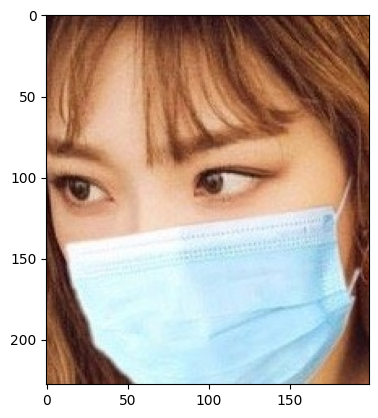

In [13]:
img = mpimg.imread("/content/data/with_mask/with_mask_1177.jpg")
imgplot = plt.imshow(img)
plt.show()

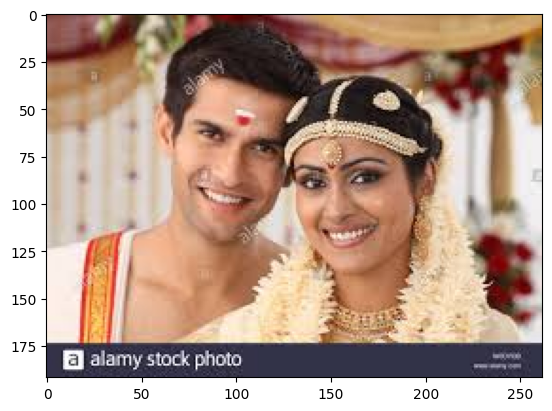

In [14]:
img = mpimg.imread("/content/data/without_mask/without_mask_1807.jpg")
imgplot = plt.imshow(img)
plt.show()

In [15]:
with_mask_path = "/content/data/with_mask/"

data = []
for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128, 128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path = "/content/data/without_mask/"

for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128, 128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [16]:
len(data)

7553

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
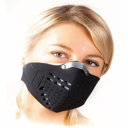

In [17]:
data[0]

In [18]:
type(data[0])

numpy.ndarray

In [19]:
data[0].shape

(128, 128, 3)

In [20]:
X = np.array(data)
Y = np.array(labels)

In [21]:
type(X)

numpy.ndarray

In [22]:
type(Y)

numpy.ndarray

In [23]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [26]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [27]:
X_train_scaled[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99215686, 0.99215686, 0.99215686]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.97647059, 0.97647059, 0.98039216],
        [0.98823529, 0.98823529, 0.98823529],
        [0.99215686, 0.99215686, 0.99607843]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.91764706, 0.91764706, 0.92156863],
        [0.9372549 , 0.9372549 , 0.94509804],
        [0.94117647, 0.9372549 , 0.94901961]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

In [28]:
import tensorflow as tf
from tensorflow import keras

In [29]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128, 128, 3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))


In [30]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [31]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 11s 25ms/step - loss: 0.4988 - acc: 0.7813 - val_loss: 0.2827 - val_acc: 0.8826
Epoch 2/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2832 - acc: 0.8926 - val_loss: 0.2550 - val_acc: 0.8909
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2421 - acc: 0.9062 - val_loss: 0.1961 - val_acc: 0.9223
Epoch 4/5
170/170 [==============================] - 3s 20ms/step - loss: 0.1982 - acc: 0.9193 - val_loss: 0.2098 - val_acc: 0.9124
Epoch 5/5
170/170 [==============================] - 3s 18ms/step - loss: 0.1600 - acc: 0.9441 - val_loss: 0.1773 - val_acc: 0.9273


In [32]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print("Test Accuracy: ", accuracy)

48/48 [==============================] - 1s 12ms/step - loss: 0.1835 - acc: 0.9265
Test Accuracy:  0.9265387058258057


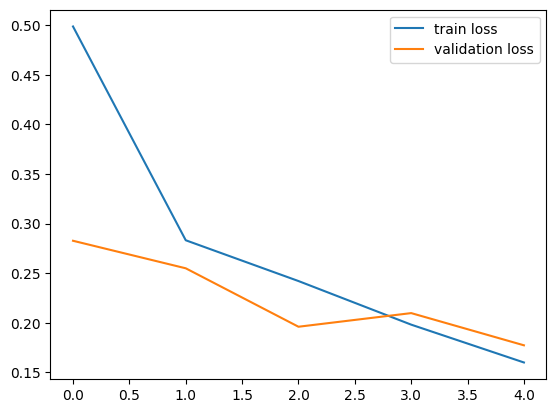

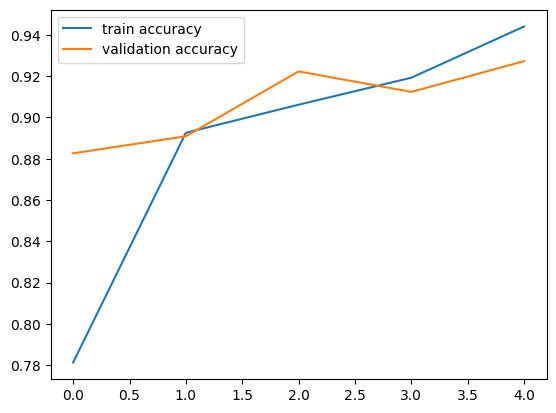

In [34]:
h = history

plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/business-woman-wearing-a-mask-f1.jpg


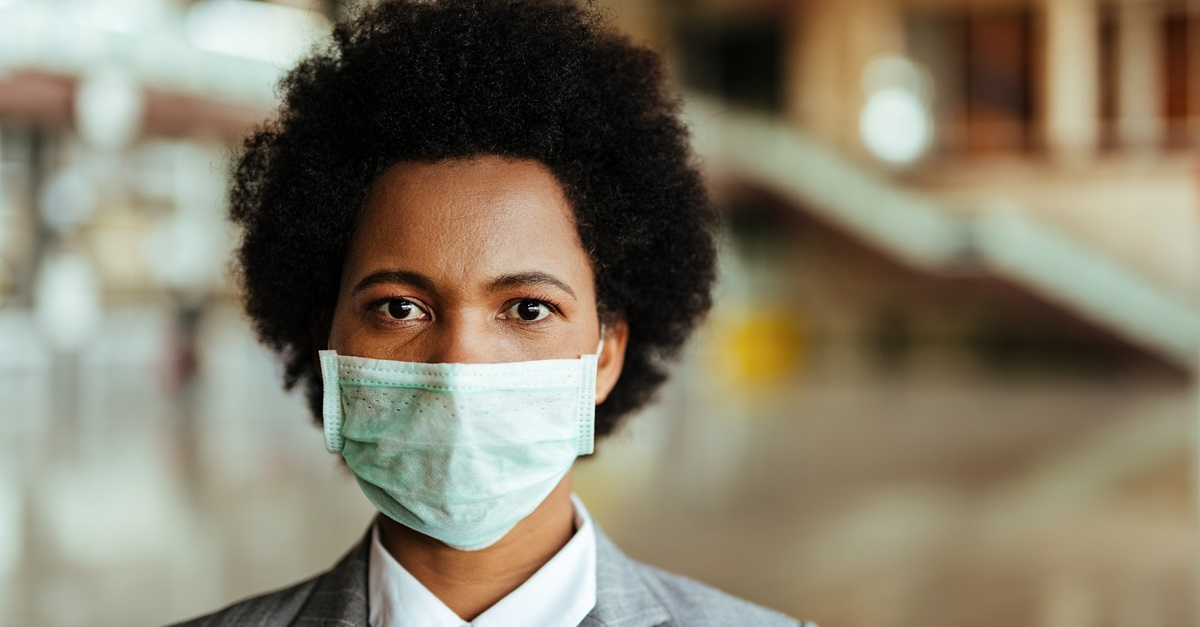

1/1 [==============================] - 1s 745ms/step
[[0.24172392 0.80166507]]
1
The person in the image is wearing a mask.


In [35]:
input_image_path = input("Path of the image to be predicted: ")

input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128, 128))
input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

input_prediction = model.predict(input_image_reshaped)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 1:
  print("The person in the image is wearing a mask.")
else:
  print("The person in the image is not wearing a mask.")